count    324.000000
mean       0.016579
std        0.055161
min       -0.132403
25%        0.002470
50%        0.015929
75%        0.061076
max        0.089447
Name: BNDX_Price, dtype: float64
count    324.000000
mean       0.383911
std        0.232583
min        0.000245
25%        0.188531
50%        0.327728
75%        0.619730
max        0.791999
Name: SPY_Price, dtype: float64
count    324.000000
mean       0.171917
std        0.104216
min       -0.092177
25%        0.092725
50%        0.158965
75%        0.204780
max        0.423904
Name: EWJ_Price, dtype: float64


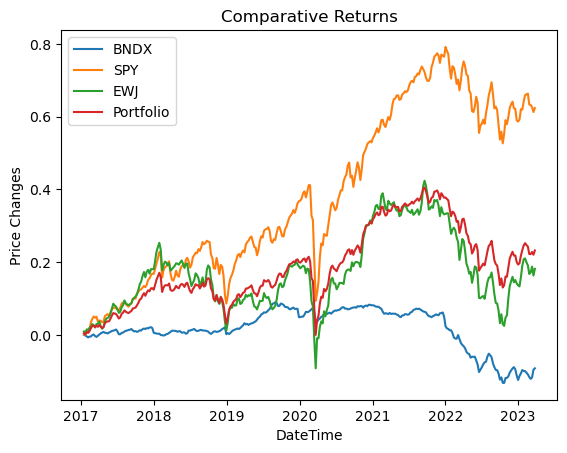

In [126]:
import requests
import pandas as pd
from datetime import datetime
import seaborn as sns

titlealpha = "Comparative Returns"
w_1 = 0.3
w_2 = 0.3
w_3 = 0.4

def add_ticker(ticker, url, letter):
    url = "https://api.twelvedata.com/time_series?symbol=" + ticker + "&interval=1day&format=CSV&dp=3&start_date=01/01/2017 4:48 PM&end_date=03/24/2023 4:48 PM&apikey=f2321a1f62fb48a2ab00cd85bf4d04a6"
    r = requests.get(url)
    with open('output.csv', 'w+') as f:
        f.write(r.text)
    letter = pd.read_csv('output.csv', header=None)
    letter = letter[0].str.split(';', expand=True)
    
    letter = letter.drop([1, 2, 3, 5], axis=1)
    column_names = ["DateTime", "Price"]
    letter.columns = [f"{ticker}_DateTime", f"{ticker}_Price"] # change column names
    letter.drop(index=letter.index[0], axis=0, inplace=True)
    
    letter[f"{ticker}_DateTime"] = pd.to_datetime(letter[f"{ticker}_DateTime"], format='%Y-%m-%d %H:%M:%S')
    letter.set_index(f"{ticker}_DateTime", inplace=True)
    letter[f"{ticker}_Price"] = pd.to_numeric(letter[f"{ticker}_Price"])
    letter = letter.resample('W').mean()
    letter[f"{ticker}_Price"] = letter[f"{ticker}_Price"].pct_change().cumsum()
    print(letter[f"{ticker}_Price"].describe())
    plotted = sns.lineplot(data=letter, x=letter.index, y=f"{ticker}_Price", label=ticker).set(title=titlealpha)
    letter = letter.rename(columns={f"{ticker}_Price": ticker}) # rename price column

    return letter

BNDX_df = add_ticker("BNDX", "kerei", "k")
SPY_df = add_ticker("SPY", "kerei", "v")
EWJ_df = add_ticker("EWJ", "kerei", "t")

# concatenate the dataframes
z = pd.concat([BNDX_df, SPY_df, EWJ_df], axis=1)

# calculate weighted price column
z[('Weighted_Price', '')] = w_1 * BNDX_df['BNDX'] + w_2 * SPY_df['SPY'] + w_3 * EWJ_df['EWJ']

# Plot the weekly average price on a line plot
az = sns.lineplot(data=z, x=z.index, y=('Weighted_Price', ''), label="Portfolio").set(xlabel ="DateTime", ylabel = "Price Changes", title=titlealpha)
